# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

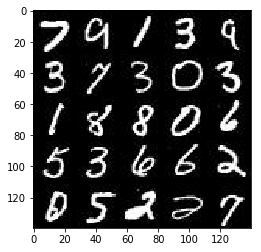

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

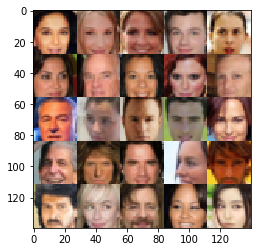

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [55]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    image_input_real = tf.placeholder(tf.float32,shape=(None,image_width, image_height, image_channels),name='input_real')
    image_input_fake = tf.placeholder(tf.float32,shape=(None,z_dim),name='input_fake')
    learning_rate = tf.placeholder(tf.float32,name='lr_placeholder')
    return image_input_real, image_input_fake, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Leaky_relu

In [45]:
def leaky_relu(x, alpha=0.1, name='leaky_relu'):
    return tf.maximum(x, alpha * x, name=name)

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [46]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
#     with tf.variable_scope('discriminator',reuse=reuse):
#         # Hidden layer
#         h1 = tf.layers.dense(images, 128, activation=None)
#         # Leaky ReLU
#         h1 = tf.maximum(0.01 * h1, h1)
        
#         logits = tf.layers.dense(h1, 1, activation=None)
#         logits = tf.reshape(logits,(-1,))
        
#         out = tf.sigmoid(logits)
#   return out, logits

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28*X
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = leaky_relu(x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        # 7x7x128

        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        # 4x4x256
        
        x2 = tf.layers.conv2d(relu1, 512, 5, strides=2, padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_relu(bn2)
        # 2x2x512
        
        # Flatten it
#         flat = tf.reshape(relu2, (-1, 2*2*512))
        flat = tf.contrib.layers.flatten(relu2)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [47]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = leaky_relu(x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = leaky_relu(x2)
        # 14x14x256 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim now
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [48]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.05
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [49]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    #Optimize
#     d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
#     g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
     
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)    
    with tf.control_dependencies(update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [50]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [72]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#     tf.reset_default_graph()
    # Create our input placeholders
    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], len(data_image_mode), z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, l_rate, beta1)
    
    print(l_rate)
    
    samples = []
    losses = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            i = 0
            for batch_images in get_batches(batch_size):
                i += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # TODO: Train Model
#                 batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2
                
#                 print('batch_images')
#                 print(batch_images)
#                 print('\n')
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images,l_rate: learning_rate,input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, l_rate: learning_rate, input_real: batch_images})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, l_rate: learning_rate, input_real: batch_images})
                
                # show output every 100 batches
                if i % 10 == 0:
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                    "Discriminator Loss: {:.4f}...".format(train_loss_d),
                    "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    losses.append((train_loss_d, train_loss_g))
                    
                if i % 100 == 0:
                    show_generator_output(sess, 20, input_z, data_shape[3], data_image_mode)
                    sample_z = np.random.uniform(-1, 1, size=(16, z_dim))
                    gen_samples = sess.run(
                           generator(input_z, data_shape[3], is_train=False),
                           feed_dict={input_z: sample_z})
                    samples.append(gen_samples)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Tensor("lr_placeholder:0", dtype=float32)
Epoch 1/2... Discriminator Loss: 0.5723... Generator Loss: 1.4738
Epoch 1/2... Discriminator Loss: 1.2777... Generator Loss: 0.6805
Epoch 1/2... Discriminator Loss: 0.6793... Generator Loss: 1.1780
Epoch 1/2... Discriminator Loss: 2.7398... Generator Loss: 0.1881
Epoch 1/2... Discriminator Loss: 2.0009... Generator Loss: 1.0191
Epoch 1/2... Discriminator Loss: 1.7718... Generator Loss: 0.3451
Epoch 1/2... Discriminator Loss: 1.9623... Generator Loss: 0.3314
Epoch 1/2... Discriminator Loss: 1.7346... Generator Loss: 0.5685
Epoch 1/2... Discriminator Loss: 1.7683... Generator Loss: 0.4150
Epoch 1/2... Discriminator Loss: 1.8343... Generator Loss: 0.3999


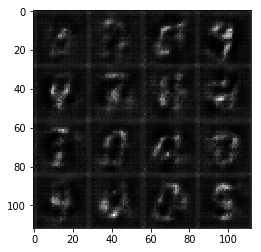

Epoch 1/2... Discriminator Loss: 1.6520... Generator Loss: 0.9245
Epoch 1/2... Discriminator Loss: 1.5347... Generator Loss: 0.5267
Epoch 1/2... Discriminator Loss: 1.4860... Generator Loss: 0.5843
Epoch 1/2... Discriminator Loss: 1.5656... Generator Loss: 0.9895
Epoch 1/2... Discriminator Loss: 1.5702... Generator Loss: 0.4465
Epoch 1/2... Discriminator Loss: 1.4213... Generator Loss: 0.9978
Epoch 1/2... Discriminator Loss: 1.3435... Generator Loss: 1.0266
Epoch 1/2... Discriminator Loss: 1.5052... Generator Loss: 0.5440
Epoch 1/2... Discriminator Loss: 1.3797... Generator Loss: 0.5075
Epoch 1/2... Discriminator Loss: 1.3491... Generator Loss: 0.5382


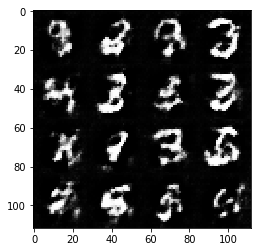

Epoch 1/2... Discriminator Loss: 1.3141... Generator Loss: 0.6826
Epoch 1/2... Discriminator Loss: 1.2982... Generator Loss: 1.1524
Epoch 1/2... Discriminator Loss: 1.3587... Generator Loss: 0.5300
Epoch 1/2... Discriminator Loss: 1.3053... Generator Loss: 0.7692
Epoch 1/2... Discriminator Loss: 1.3502... Generator Loss: 0.5863
Epoch 1/2... Discriminator Loss: 1.2241... Generator Loss: 0.9722
Epoch 1/2... Discriminator Loss: 1.4174... Generator Loss: 1.5087
Epoch 1/2... Discriminator Loss: 1.3207... Generator Loss: 0.7713
Epoch 1/2... Discriminator Loss: 1.4425... Generator Loss: 0.5896
Epoch 1/2... Discriminator Loss: 1.3895... Generator Loss: 0.9881


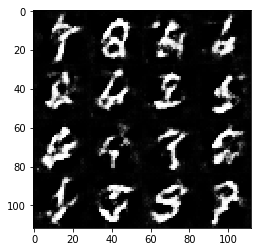

Epoch 1/2... Discriminator Loss: 1.3181... Generator Loss: 0.7857
Epoch 1/2... Discriminator Loss: 1.3177... Generator Loss: 0.7046
Epoch 1/2... Discriminator Loss: 1.5181... Generator Loss: 0.4424
Epoch 1/2... Discriminator Loss: 1.4843... Generator Loss: 0.4435
Epoch 1/2... Discriminator Loss: 1.4019... Generator Loss: 0.8895
Epoch 1/2... Discriminator Loss: 1.3960... Generator Loss: 0.5694
Epoch 1/2... Discriminator Loss: 1.3866... Generator Loss: 0.5911
Epoch 1/2... Discriminator Loss: 1.4349... Generator Loss: 0.5654
Epoch 1/2... Discriminator Loss: 1.9842... Generator Loss: 0.2436
Epoch 1/2... Discriminator Loss: 1.8167... Generator Loss: 0.3101


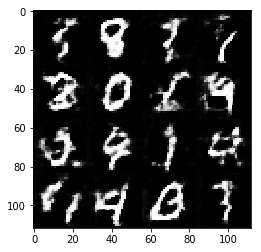

Epoch 1/2... Discriminator Loss: 1.5377... Generator Loss: 0.4011
Epoch 1/2... Discriminator Loss: 1.3430... Generator Loss: 0.5596
Epoch 1/2... Discriminator Loss: 1.6739... Generator Loss: 1.2420
Epoch 1/2... Discriminator Loss: 1.5884... Generator Loss: 0.4688
Epoch 1/2... Discriminator Loss: 1.3876... Generator Loss: 0.7384
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.5014
Epoch 1/2... Discriminator Loss: 1.3095... Generator Loss: 0.7806
Epoch 1/2... Discriminator Loss: 1.3814... Generator Loss: 0.8369
Epoch 1/2... Discriminator Loss: 1.5302... Generator Loss: 1.0672
Epoch 1/2... Discriminator Loss: 1.3889... Generator Loss: 0.8470


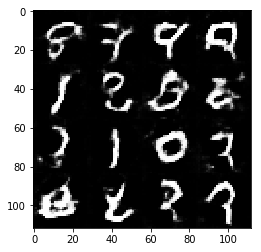

Epoch 1/2... Discriminator Loss: 1.5338... Generator Loss: 0.4252
Epoch 1/2... Discriminator Loss: 1.4279... Generator Loss: 0.7038
Epoch 1/2... Discriminator Loss: 1.6460... Generator Loss: 0.3605
Epoch 1/2... Discriminator Loss: 1.6329... Generator Loss: 0.3586
Epoch 1/2... Discriminator Loss: 1.3509... Generator Loss: 0.9088
Epoch 1/2... Discriminator Loss: 1.4101... Generator Loss: 0.5110
Epoch 1/2... Discriminator Loss: 1.4688... Generator Loss: 0.5263
Epoch 1/2... Discriminator Loss: 1.4566... Generator Loss: 0.5793
Epoch 1/2... Discriminator Loss: 1.5512... Generator Loss: 0.4332
Epoch 1/2... Discriminator Loss: 1.3885... Generator Loss: 0.8277


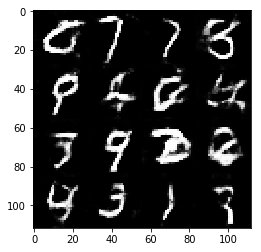

Epoch 1/2... Discriminator Loss: 1.3360... Generator Loss: 0.7117
Epoch 1/2... Discriminator Loss: 1.5199... Generator Loss: 1.2106
Epoch 1/2... Discriminator Loss: 1.3658... Generator Loss: 0.5332
Epoch 1/2... Discriminator Loss: 1.3591... Generator Loss: 0.8166
Epoch 1/2... Discriminator Loss: 1.4085... Generator Loss: 1.0351
Epoch 1/2... Discriminator Loss: 1.5074... Generator Loss: 0.4489
Epoch 1/2... Discriminator Loss: 1.4389... Generator Loss: 0.8189
Epoch 1/2... Discriminator Loss: 1.3877... Generator Loss: 0.7647
Epoch 1/2... Discriminator Loss: 1.4245... Generator Loss: 0.8978
Epoch 1/2... Discriminator Loss: 1.4201... Generator Loss: 0.5240


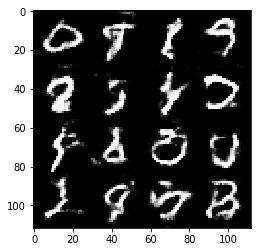

Epoch 1/2... Discriminator Loss: 1.4321... Generator Loss: 0.5222
Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 0.4817
Epoch 1/2... Discriminator Loss: 1.3932... Generator Loss: 0.5317
Epoch 1/2... Discriminator Loss: 1.3448... Generator Loss: 0.8627
Epoch 1/2... Discriminator Loss: 1.5138... Generator Loss: 0.4001
Epoch 1/2... Discriminator Loss: 1.4794... Generator Loss: 0.9326
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 0.6729
Epoch 1/2... Discriminator Loss: 1.3388... Generator Loss: 0.7021
Epoch 1/2... Discriminator Loss: 1.3706... Generator Loss: 0.6003
Epoch 1/2... Discriminator Loss: 1.3437... Generator Loss: 0.9873


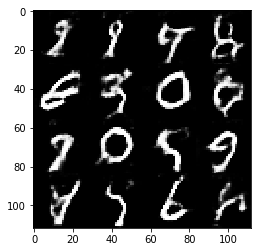

Epoch 1/2... Discriminator Loss: 1.3363... Generator Loss: 1.0650
Epoch 1/2... Discriminator Loss: 1.3784... Generator Loss: 1.0447
Epoch 1/2... Discriminator Loss: 1.3535... Generator Loss: 0.6373
Epoch 1/2... Discriminator Loss: 1.5148... Generator Loss: 0.4340
Epoch 1/2... Discriminator Loss: 1.4499... Generator Loss: 1.1448
Epoch 1/2... Discriminator Loss: 1.4492... Generator Loss: 0.4666
Epoch 1/2... Discriminator Loss: 1.4209... Generator Loss: 0.5575
Epoch 1/2... Discriminator Loss: 1.4243... Generator Loss: 0.9916
Epoch 1/2... Discriminator Loss: 1.4074... Generator Loss: 0.5197
Epoch 1/2... Discriminator Loss: 1.3703... Generator Loss: 0.8236


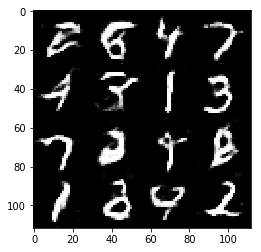

Epoch 1/2... Discriminator Loss: 1.3336... Generator Loss: 0.8015
Epoch 1/2... Discriminator Loss: 1.3421... Generator Loss: 0.5691
Epoch 1/2... Discriminator Loss: 1.4070... Generator Loss: 0.5087
Epoch 2/2... Discriminator Loss: 1.3581... Generator Loss: 0.8805
Epoch 2/2... Discriminator Loss: 1.3728... Generator Loss: 0.7235
Epoch 2/2... Discriminator Loss: 1.4359... Generator Loss: 1.1924
Epoch 2/2... Discriminator Loss: 1.2919... Generator Loss: 0.8463
Epoch 2/2... Discriminator Loss: 1.6617... Generator Loss: 0.3146
Epoch 2/2... Discriminator Loss: 1.4059... Generator Loss: 0.6035
Epoch 2/2... Discriminator Loss: 1.4494... Generator Loss: 0.5102
Epoch 2/2... Discriminator Loss: 1.3414... Generator Loss: 0.6042
Epoch 2/2... Discriminator Loss: 1.3799... Generator Loss: 0.6697
Epoch 2/2... Discriminator Loss: 1.4111... Generator Loss: 0.5529


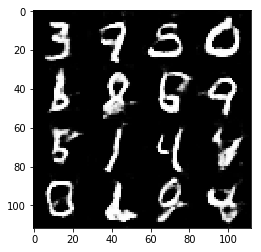

Epoch 2/2... Discriminator Loss: 1.4530... Generator Loss: 0.4394
Epoch 2/2... Discriminator Loss: 1.3538... Generator Loss: 0.5333
Epoch 2/2... Discriminator Loss: 1.5364... Generator Loss: 0.4119
Epoch 2/2... Discriminator Loss: 1.2353... Generator Loss: 0.7554
Epoch 2/2... Discriminator Loss: 1.3742... Generator Loss: 0.5260
Epoch 2/2... Discriminator Loss: 1.2432... Generator Loss: 1.1619
Epoch 2/2... Discriminator Loss: 1.2367... Generator Loss: 0.8999
Epoch 2/2... Discriminator Loss: 1.5023... Generator Loss: 0.4293
Epoch 2/2... Discriminator Loss: 1.3471... Generator Loss: 0.6223
Epoch 2/2... Discriminator Loss: 1.3535... Generator Loss: 1.0675


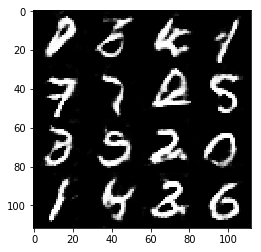

Epoch 2/2... Discriminator Loss: 1.6444... Generator Loss: 0.3119
Epoch 2/2... Discriminator Loss: 1.2526... Generator Loss: 0.7163
Epoch 2/2... Discriminator Loss: 1.5607... Generator Loss: 0.3596
Epoch 2/2... Discriminator Loss: 1.3441... Generator Loss: 0.8041
Epoch 2/2... Discriminator Loss: 1.3202... Generator Loss: 0.6315
Epoch 2/2... Discriminator Loss: 1.4862... Generator Loss: 0.8592
Epoch 2/2... Discriminator Loss: 1.3645... Generator Loss: 0.5717
Epoch 2/2... Discriminator Loss: 1.3689... Generator Loss: 1.0020
Epoch 2/2... Discriminator Loss: 1.3186... Generator Loss: 0.9858
Epoch 2/2... Discriminator Loss: 1.4186... Generator Loss: 0.9646


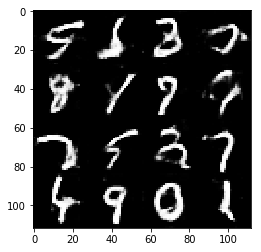

Epoch 2/2... Discriminator Loss: 1.2632... Generator Loss: 0.6273
Epoch 2/2... Discriminator Loss: 1.6274... Generator Loss: 0.3358
Epoch 2/2... Discriminator Loss: 1.3834... Generator Loss: 1.0325
Epoch 2/2... Discriminator Loss: 1.4071... Generator Loss: 0.4765
Epoch 2/2... Discriminator Loss: 1.3722... Generator Loss: 0.7199
Epoch 2/2... Discriminator Loss: 1.2846... Generator Loss: 0.6038
Epoch 2/2... Discriminator Loss: 1.3859... Generator Loss: 1.0277
Epoch 2/2... Discriminator Loss: 1.2669... Generator Loss: 0.7172
Epoch 2/2... Discriminator Loss: 1.3685... Generator Loss: 0.6189
Epoch 2/2... Discriminator Loss: 1.4488... Generator Loss: 0.4523


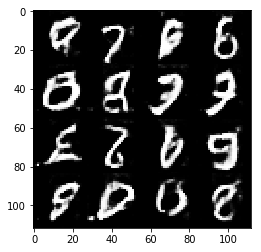

Epoch 2/2... Discriminator Loss: 1.3160... Generator Loss: 1.0980
Epoch 2/2... Discriminator Loss: 1.3056... Generator Loss: 0.8188
Epoch 2/2... Discriminator Loss: 1.5816... Generator Loss: 0.3942
Epoch 2/2... Discriminator Loss: 1.3864... Generator Loss: 0.5382
Epoch 2/2... Discriminator Loss: 1.2596... Generator Loss: 0.5705
Epoch 2/2... Discriminator Loss: 1.2662... Generator Loss: 0.6465
Epoch 2/2... Discriminator Loss: 1.2795... Generator Loss: 0.8500
Epoch 2/2... Discriminator Loss: 1.2189... Generator Loss: 0.8890
Epoch 2/2... Discriminator Loss: 1.3337... Generator Loss: 0.8693
Epoch 2/2... Discriminator Loss: 1.4170... Generator Loss: 0.8684


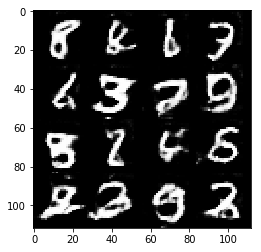

Epoch 2/2... Discriminator Loss: 1.4480... Generator Loss: 0.4679
Epoch 2/2... Discriminator Loss: 1.2215... Generator Loss: 0.7219
Epoch 2/2... Discriminator Loss: 1.3248... Generator Loss: 0.5773
Epoch 2/2... Discriminator Loss: 1.5317... Generator Loss: 0.3649
Epoch 2/2... Discriminator Loss: 1.3377... Generator Loss: 0.5655
Epoch 2/2... Discriminator Loss: 1.3859... Generator Loss: 0.4746
Epoch 2/2... Discriminator Loss: 1.2004... Generator Loss: 0.9460
Epoch 2/2... Discriminator Loss: 1.5098... Generator Loss: 1.3999
Epoch 2/2... Discriminator Loss: 1.5261... Generator Loss: 0.3782
Epoch 2/2... Discriminator Loss: 1.2025... Generator Loss: 0.7401


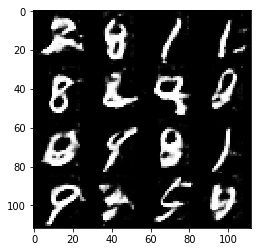

Epoch 2/2... Discriminator Loss: 1.4117... Generator Loss: 0.4733
Epoch 2/2... Discriminator Loss: 1.2643... Generator Loss: 0.9530
Epoch 2/2... Discriminator Loss: 1.2142... Generator Loss: 1.0154
Epoch 2/2... Discriminator Loss: 1.6145... Generator Loss: 0.3509
Epoch 2/2... Discriminator Loss: 2.3329... Generator Loss: 0.1471
Epoch 2/2... Discriminator Loss: 1.3182... Generator Loss: 0.5792
Epoch 2/2... Discriminator Loss: 1.3208... Generator Loss: 0.5538
Epoch 2/2... Discriminator Loss: 1.2538... Generator Loss: 0.9645
Epoch 2/2... Discriminator Loss: 1.3177... Generator Loss: 0.8514
Epoch 2/2... Discriminator Loss: 1.2372... Generator Loss: 0.9646


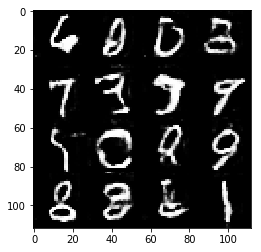

Epoch 2/2... Discriminator Loss: 1.2319... Generator Loss: 0.9237
Epoch 2/2... Discriminator Loss: 1.3184... Generator Loss: 0.7795
Epoch 2/2... Discriminator Loss: 1.7622... Generator Loss: 0.2848
Epoch 2/2... Discriminator Loss: 1.4358... Generator Loss: 0.4540
Epoch 2/2... Discriminator Loss: 1.2163... Generator Loss: 1.1858
Epoch 2/2... Discriminator Loss: 1.2568... Generator Loss: 0.7380
Epoch 2/2... Discriminator Loss: 1.4615... Generator Loss: 0.4004
Epoch 2/2... Discriminator Loss: 1.0912... Generator Loss: 0.9211
Epoch 2/2... Discriminator Loss: 1.4144... Generator Loss: 0.5369
Epoch 2/2... Discriminator Loss: 1.5082... Generator Loss: 0.3973


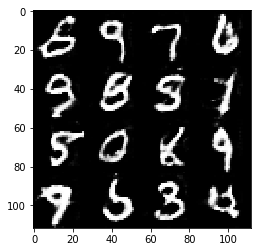

Epoch 2/2... Discriminator Loss: 1.5270... Generator Loss: 1.0922
Epoch 2/2... Discriminator Loss: 1.2952... Generator Loss: 1.1407
Epoch 2/2... Discriminator Loss: 1.2774... Generator Loss: 0.6382
Epoch 2/2... Discriminator Loss: 1.3035... Generator Loss: 0.7272
Epoch 2/2... Discriminator Loss: 1.2891... Generator Loss: 0.6142
Epoch 2/2... Discriminator Loss: 1.2846... Generator Loss: 0.7764
Epoch 2/2... Discriminator Loss: 1.2792... Generator Loss: 0.5963
Epoch 2/2... Discriminator Loss: 1.3590... Generator Loss: 1.0146
Epoch 2/2... Discriminator Loss: 1.3321... Generator Loss: 0.5193
Epoch 2/2... Discriminator Loss: 1.3451... Generator Loss: 0.4663


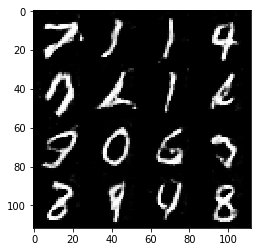

Epoch 2/2... Discriminator Loss: 1.4678... Generator Loss: 1.0873
Epoch 2/2... Discriminator Loss: 1.3213... Generator Loss: 0.4915
Epoch 2/2... Discriminator Loss: 1.1589... Generator Loss: 0.7260


In [73]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Tensor("lr_placeholder:0", dtype=float32)
Epoch 1/1... Discriminator Loss: 4.2033... Generator Loss: 0.0449
Epoch 1/1... Discriminator Loss: 2.3229... Generator Loss: 0.4543
Epoch 1/1... Discriminator Loss: 2.8470... Generator Loss: 0.4515
Epoch 1/1... Discriminator Loss: 2.5615... Generator Loss: 0.2283
Epoch 1/1... Discriminator Loss: 2.0996... Generator Loss: 0.3911
Epoch 1/1... Discriminator Loss: 2.3948... Generator Loss: 0.2753
Epoch 1/1... Discriminator Loss: 2.3459... Generator Loss: 0.4556
Epoch 1/1... Discriminator Loss: 2.4148... Generator Loss: 0.3431
Epoch 1/1... Discriminator Loss: 2.2354... Generator Loss: 0.5162
Epoch 1/1... Discriminator Loss: 1.9104... Generator Loss: 0.3194


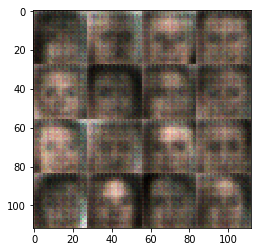

Epoch 1/1... Discriminator Loss: 1.8507... Generator Loss: 0.4796
Epoch 1/1... Discriminator Loss: 1.9260... Generator Loss: 0.4404
Epoch 1/1... Discriminator Loss: 1.9926... Generator Loss: 0.5007
Epoch 1/1... Discriminator Loss: 1.8498... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.7537... Generator Loss: 0.4473
Epoch 1/1... Discriminator Loss: 1.7921... Generator Loss: 0.3938
Epoch 1/1... Discriminator Loss: 1.5390... Generator Loss: 1.2934
Epoch 1/1... Discriminator Loss: 1.9279... Generator Loss: 0.4293
Epoch 1/1... Discriminator Loss: 1.8613... Generator Loss: 0.3414
Epoch 1/1... Discriminator Loss: 1.6756... Generator Loss: 1.0067


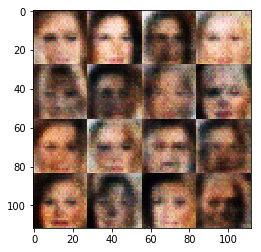

Epoch 1/1... Discriminator Loss: 1.6408... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.7644... Generator Loss: 0.3679
Epoch 1/1... Discriminator Loss: 1.5645... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.6257... Generator Loss: 0.7263
Epoch 1/1... Discriminator Loss: 1.7253... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 1.6002... Generator Loss: 0.5502
Epoch 1/1... Discriminator Loss: 1.6845... Generator Loss: 0.5188
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 1.0400
Epoch 1/1... Discriminator Loss: 1.4512... Generator Loss: 0.9326
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 1.1537


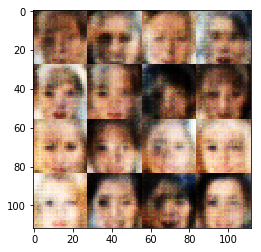

Epoch 1/1... Discriminator Loss: 1.5826... Generator Loss: 0.4477
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 1.0344
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 1.0535
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.9357
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.6301... Generator Loss: 0.5520
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 1.2467
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 1.1197
Epoch 1/1... Discriminator Loss: 1.6951... Generator Loss: 0.5067
Epoch 1/1... Discriminator Loss: 1.5079... Generator Loss: 0.8160


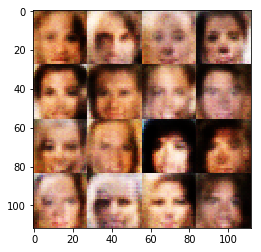

Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 1.3329
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.7560
Epoch 1/1... Discriminator Loss: 1.5073... Generator Loss: 1.0246
Epoch 1/1... Discriminator Loss: 1.7913... Generator Loss: 0.3602
Epoch 1/1... Discriminator Loss: 1.6559... Generator Loss: 0.4121
Epoch 1/1... Discriminator Loss: 1.5643... Generator Loss: 0.5248
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.3761
Epoch 1/1... Discriminator Loss: 1.6036... Generator Loss: 0.4995
Epoch 1/1... Discriminator Loss: 1.7863... Generator Loss: 0.3152
Epoch 1/1... Discriminator Loss: 1.5177... Generator Loss: 1.6507


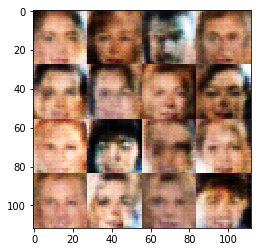

Epoch 1/1... Discriminator Loss: 1.6710... Generator Loss: 0.5032
Epoch 1/1... Discriminator Loss: 1.2386... Generator Loss: 1.9127
Epoch 1/1... Discriminator Loss: 1.7709... Generator Loss: 0.3837
Epoch 1/1... Discriminator Loss: 1.4993... Generator Loss: 0.6447
Epoch 1/1... Discriminator Loss: 1.6937... Generator Loss: 0.6261
Epoch 1/1... Discriminator Loss: 1.6337... Generator Loss: 0.4505
Epoch 1/1... Discriminator Loss: 1.9328... Generator Loss: 0.2625
Epoch 1/1... Discriminator Loss: 1.8462... Generator Loss: 0.3563
Epoch 1/1... Discriminator Loss: 1.7302... Generator Loss: 0.4094
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 1.0522


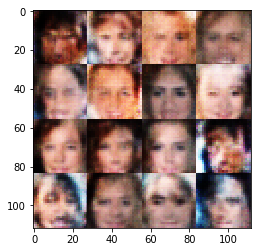

Epoch 1/1... Discriminator Loss: 1.6864... Generator Loss: 0.4992
Epoch 1/1... Discriminator Loss: 1.6055... Generator Loss: 0.5247
Epoch 1/1... Discriminator Loss: 1.7094... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.5984... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.5297... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.8772
Epoch 1/1... Discriminator Loss: 1.6947... Generator Loss: 0.5280
Epoch 1/1... Discriminator Loss: 1.7166... Generator Loss: 0.3850
Epoch 1/1... Discriminator Loss: 1.1568... Generator Loss: 1.8591
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.9655


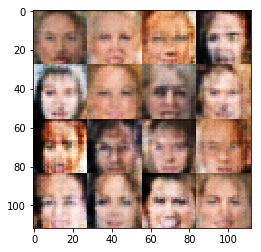

Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.5864
Epoch 1/1... Discriminator Loss: 1.5595... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.5345... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 1.2875
Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 0.9765
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 2.0817
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.8328
Epoch 1/1... Discriminator Loss: 1.4933... Generator Loss: 0.5089
Epoch 1/1... Discriminator Loss: 1.1401... Generator Loss: 1.5847
Epoch 1/1... Discriminator Loss: 1.5509... Generator Loss: 0.4452


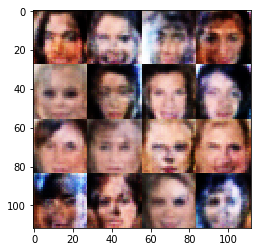

Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 0.5266
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 0.9899
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 0.6595
Epoch 1/1... Discriminator Loss: 1.4825... Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.5744... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.4841... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.5303... Generator Loss: 0.3806


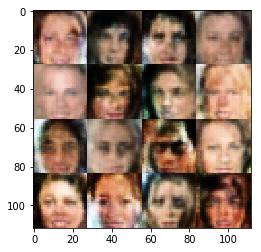

Epoch 1/1... Discriminator Loss: 1.7093... Generator Loss: 0.4053
Epoch 1/1... Discriminator Loss: 1.9488... Generator Loss: 0.2511
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.3690... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 1.7644... Generator Loss: 0.3952
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.7630
Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.3840
Epoch 1/1... Discriminator Loss: 1.1333... Generator Loss: 1.3457
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 1.3372
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 1.9995


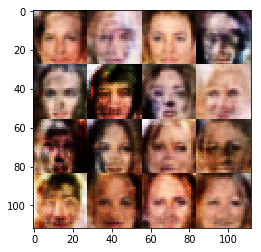

Epoch 1/1... Discriminator Loss: 1.5678... Generator Loss: 0.4342
Epoch 1/1... Discriminator Loss: 1.4868... Generator Loss: 0.6182
Epoch 1/1... Discriminator Loss: 1.1139... Generator Loss: 1.7744
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.6882
Epoch 1/1... Discriminator Loss: 1.7611... Generator Loss: 0.3239
Epoch 1/1... Discriminator Loss: 1.5118... Generator Loss: 0.6412
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 1.4804
Epoch 1/1... Discriminator Loss: 1.5926... Generator Loss: 0.4709
Epoch 1/1... Discriminator Loss: 1.7537... Generator Loss: 0.3758
Epoch 1/1... Discriminator Loss: 1.5600... Generator Loss: 0.4515


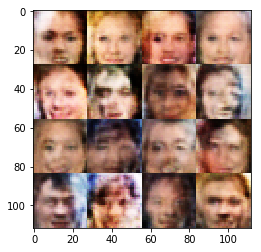

Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.3448
Epoch 1/1... Discriminator Loss: 1.4649... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.4719... Generator Loss: 0.4138
Epoch 1/1... Discriminator Loss: 1.1182... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 1.6015... Generator Loss: 0.5009
Epoch 1/1... Discriminator Loss: 1.5223... Generator Loss: 0.5502
Epoch 1/1... Discriminator Loss: 1.3451... Generator Loss: 0.8822
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 0.9520
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.8388
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.8968


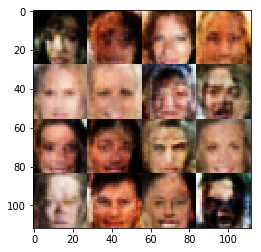

Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.5213
Epoch 1/1... Discriminator Loss: 1.4865... Generator Loss: 0.5351
Epoch 1/1... Discriminator Loss: 1.5279... Generator Loss: 0.4963
Epoch 1/1... Discriminator Loss: 1.4754... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.2159... Generator Loss: 1.0294
Epoch 1/1... Discriminator Loss: 0.9768... Generator Loss: 1.4162
Epoch 1/1... Discriminator Loss: 1.5820... Generator Loss: 0.4325
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 1.5519
Epoch 1/1... Discriminator Loss: 1.5242... Generator Loss: 0.5125


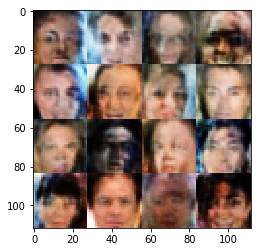

Epoch 1/1... Discriminator Loss: 1.1064... Generator Loss: 0.9714
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.6457... Generator Loss: 0.3404
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.9666
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 1.2233
Epoch 1/1... Discriminator Loss: 1.1795... Generator Loss: 0.8684
Epoch 1/1... Discriminator Loss: 1.2512... Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 1.3746
Epoch 1/1... Discriminator Loss: 1.3507... Generator Loss: 0.5587
Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 1.4966


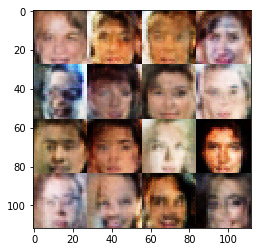

Epoch 1/1... Discriminator Loss: 1.3267... Generator Loss: 0.7662
Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.7185
Epoch 1/1... Discriminator Loss: 1.5778... Generator Loss: 0.4867
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.5524... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 0.5462
Epoch 1/1... Discriminator Loss: 1.5570... Generator Loss: 0.4918
Epoch 1/1... Discriminator Loss: 1.4337... Generator Loss: 0.5612
Epoch 1/1... Discriminator Loss: 1.6215... Generator Loss: 0.3977
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 0.9641


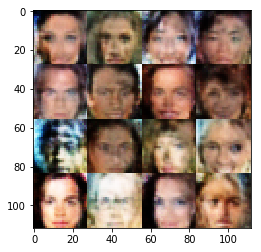

Epoch 1/1... Discriminator Loss: 1.5495... Generator Loss: 0.5167
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.6830... Generator Loss: 0.3758
Epoch 1/1... Discriminator Loss: 1.2135... Generator Loss: 1.1132
Epoch 1/1... Discriminator Loss: 0.9835... Generator Loss: 1.1177
Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.7591
Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.6966... Generator Loss: 0.3636
Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.5585


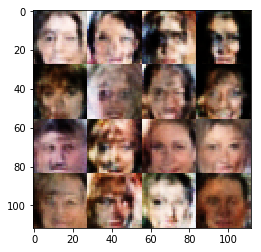

Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.6559... Generator Loss: 0.4821
Epoch 1/1... Discriminator Loss: 1.0684... Generator Loss: 1.3134
Epoch 1/1... Discriminator Loss: 1.4593... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.9174
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.7259
Epoch 1/1... Discriminator Loss: 1.1024... Generator Loss: 1.0941
Epoch 1/1... Discriminator Loss: 0.9664... Generator Loss: 1.4296
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.4198
Epoch 1/1... Discriminator Loss: 1.1348... Generator Loss: 1.3029


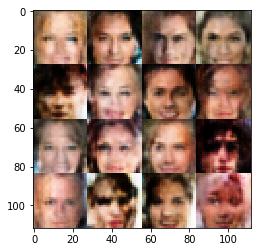

Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.5835... Generator Loss: 0.3802
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.5766
Epoch 1/1... Discriminator Loss: 1.3546... Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.5230
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.7053
Epoch 1/1... Discriminator Loss: 1.6200... Generator Loss: 0.4204
Epoch 1/1... Discriminator Loss: 1.5760... Generator Loss: 0.4786
Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.5177


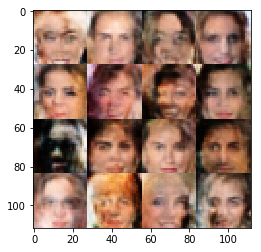

Epoch 1/1... Discriminator Loss: 1.6295... Generator Loss: 0.5916
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 0.9481
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.8321
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.6034
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.4503
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 1.5735... Generator Loss: 0.5096
Epoch 1/1... Discriminator Loss: 1.6470... Generator Loss: 0.5425
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.7653
Epoch 1/1... Discriminator Loss: 1.5462... Generator Loss: 0.6311


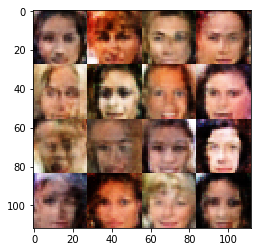

Epoch 1/1... Discriminator Loss: 1.4087... Generator Loss: 0.6121
Epoch 1/1... Discriminator Loss: 1.4055... Generator Loss: 0.4790
Epoch 1/1... Discriminator Loss: 1.0661... Generator Loss: 1.5540
Epoch 1/1... Discriminator Loss: 1.5170... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.8564
Epoch 1/1... Discriminator Loss: 1.4296... Generator Loss: 0.5571
Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.5263
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.7298


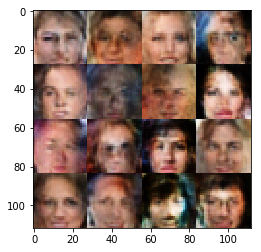

Epoch 1/1... Discriminator Loss: 1.5616... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.6063... Generator Loss: 0.4771
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.4701
Epoch 1/1... Discriminator Loss: 1.2765... Generator Loss: 1.0166
Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.5965
Epoch 1/1... Discriminator Loss: 1.2132... Generator Loss: 1.0015
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 1.0795
Epoch 1/1... Discriminator Loss: 1.4796... Generator Loss: 0.6001


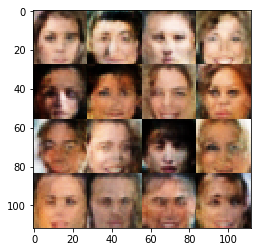

Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 0.7761
Epoch 1/1... Discriminator Loss: 1.5386... Generator Loss: 0.4784
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 2.4086
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.6700
Epoch 1/1... Discriminator Loss: 1.4352... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 0.8826
Epoch 1/1... Discriminator Loss: 1.3735... Generator Loss: 0.7008
Epoch 1/1... Discriminator Loss: 1.5990... Generator Loss: 0.5223
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 0.8298
Epoch 1/1... Discriminator Loss: 1.5639... Generator Loss: 0.4654


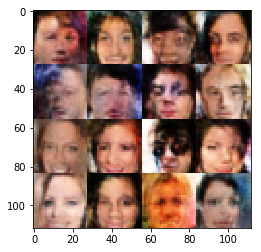

Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.9912
Epoch 1/1... Discriminator Loss: 1.0390... Generator Loss: 1.3786
Epoch 1/1... Discriminator Loss: 1.2648... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 1.5465... Generator Loss: 0.5100
Epoch 1/1... Discriminator Loss: 1.5635... Generator Loss: 0.5108
Epoch 1/1... Discriminator Loss: 1.0791... Generator Loss: 1.2998
Epoch 1/1... Discriminator Loss: 1.5024... Generator Loss: 0.5692
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.5533... Generator Loss: 0.4322
Epoch 1/1... Discriminator Loss: 1.0943... Generator Loss: 1.3954


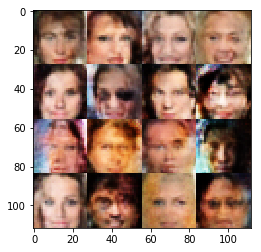

Epoch 1/1... Discriminator Loss: 1.6425... Generator Loss: 0.6043
Epoch 1/1... Discriminator Loss: 1.0101... Generator Loss: 1.2833
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.1783... Generator Loss: 1.0672
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 1.3733
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.8097
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.8313
Epoch 1/1... Discriminator Loss: 0.8972... Generator Loss: 1.3170
Epoch 1/1... Discriminator Loss: 1.3976... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.1906... Generator Loss: 1.1195


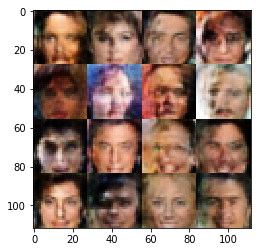

Epoch 1/1... Discriminator Loss: 1.5604... Generator Loss: 0.4818
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 1.1118... Generator Loss: 0.9659
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 1.6506... Generator Loss: 0.4688
Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.0597... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.5027... Generator Loss: 0.5960
Epoch 1/1... Discriminator Loss: 1.4756... Generator Loss: 0.6049


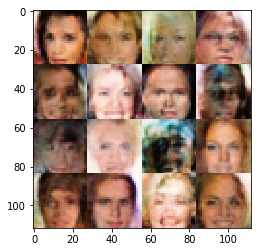

Epoch 1/1... Discriminator Loss: 1.6147... Generator Loss: 0.4494
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.9238
Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 0.9293
Epoch 1/1... Discriminator Loss: 1.4486... Generator Loss: 0.8622
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 1.1293
Epoch 1/1... Discriminator Loss: 1.6866... Generator Loss: 0.3421
Epoch 1/1... Discriminator Loss: 1.5007... Generator Loss: 0.5200
Epoch 1/1... Discriminator Loss: 1.4946... Generator Loss: 0.5355
Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.6574


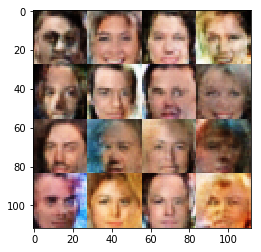

Epoch 1/1... Discriminator Loss: 1.0390... Generator Loss: 1.4960
Epoch 1/1... Discriminator Loss: 1.6736... Generator Loss: 0.4378
Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.5433
Epoch 1/1... Discriminator Loss: 1.1062... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 1.0163
Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.5015
Epoch 1/1... Discriminator Loss: 1.0140... Generator Loss: 1.4670
Epoch 1/1... Discriminator Loss: 1.4084... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.5796
Epoch 1/1... Discriminator Loss: 1.5045... Generator Loss: 0.5519


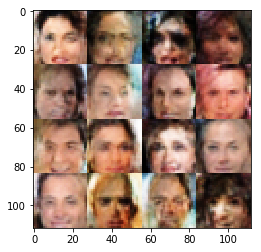

Epoch 1/1... Discriminator Loss: 1.4712... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 0.8625
Epoch 1/1... Discriminator Loss: 1.5136... Generator Loss: 0.4749
Epoch 1/1... Discriminator Loss: 1.5715... Generator Loss: 0.4378
Epoch 1/1... Discriminator Loss: 1.5038... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.7750
Epoch 1/1... Discriminator Loss: 1.5112... Generator Loss: 0.6829
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.6201
Epoch 1/1... Discriminator Loss: 1.4644... Generator Loss: 0.6005


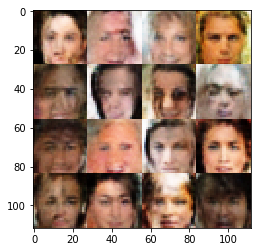

Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.4639
Epoch 1/1... Discriminator Loss: 1.4489... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.4407... Generator Loss: 0.7463
Epoch 1/1... Discriminator Loss: 1.3397... Generator Loss: 0.8784
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.4624... Generator Loss: 0.6220
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.5346
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.4598... Generator Loss: 0.6658


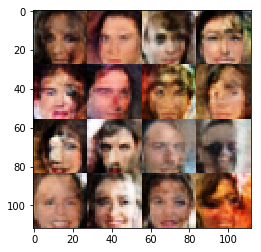

Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.4727... Generator Loss: 0.6039
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.7394... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.6348
Epoch 1/1... Discriminator Loss: 1.4706... Generator Loss: 0.5923
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.6151
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.5900


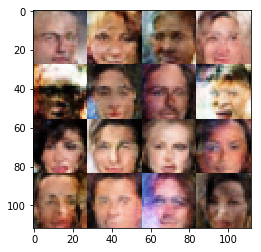

Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.5068... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.4448... Generator Loss: 0.6430
Epoch 1/1... Discriminator Loss: 1.5324... Generator Loss: 0.5169
Epoch 1/1... Discriminator Loss: 1.5924... Generator Loss: 0.5144
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 1.0145
Epoch 1/1... Discriminator Loss: 1.6280... Generator Loss: 0.4548


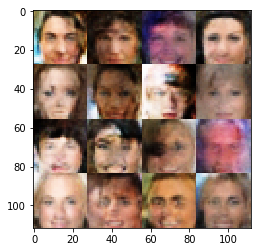

Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 0.5138
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.4994... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 1.4128... Generator Loss: 0.6210
Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 1.5042... Generator Loss: 0.5502


In [74]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.